### Bibliotecas úteis para Time Series com Python


*   Pandas
*   Scikit-learn
*   Numpy
*   Statsmodel



### Explorando os dados

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv')

In [ ]:
type(series)

In [ ]:
series.tail()



*   **header=0** : A informação de colunas está na primeira linha do arquivo
*   **parse_date=True** : Sinalizamos que o dataset contém coluna do tipo date.
*   **index_col=0** : Definimos nossa coluna indice que é a informação temporal.
*   **squeeze=True**: Sinalizamos que nos temos apenas um dado de coluna e que queremos transformar isso em uma série e não em um dataframe.



In [ ]:
from pandas import read_csv
series = read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

**Explorando e resumindo os dados**

In [ ]:
series.describe()

**Visualizando dados**

In [ ]:
import matplotlib.pyplot as plt
series.plot(figsize=(10,5), 
            linewidth=3, 
            fontsize=10,
            title='Vendas ao longo dos anos')
plt.xlabel('Ano', fontsize=10);

**Vendas no ano de 1964 e 1965**

In [ ]:
series['1964']

In [ ]:
series['1965-01']

In [ ]:
series.index

In [ ]:
series.values

**Vendas por mês de cada ano**

In [ ]:
from pandas import Grouper
from matplotlib import pyplot
from pandas import DataFrame

In [ ]:
series

In [ ]:
# Removendo os dados do ano 1972 por este ano ter menos dados
series.drop(series['1972'].index, inplace=True)

In [ ]:
grupos = series.groupby(Grouper(freq='A'))
anos = DataFrame()
for nome, grupo in grupos:
  anos[nome.year] = grupo.values

In [ ]:
anos

In [ ]:
anos.plot(figsize=(10,5)
          ,subplots=True
          ,title='Vendas em meses por anos')

**Vendas por ano - Gráfico de pontos**

In [ ]:
series.plot(style='k.')

**Visualizando a distribuição da série**

In [ ]:
series.hist()

**Gráfico de Densidade**

In [ ]:
series.plot(kind='kde')

**Visualizando Outliers por anos**

In [ ]:
grupos = series.groupby(Grouper(freq='A'))
anos = DataFrame() 
for nome, grupo in grupos:
  anos[nome.year] = grupo.values
anos.boxplot(figsize=(10,5))

**Dispersão de valores e lags**


*   Visualizando a dispersão entre o valor t e t+n



In [ ]:
from pandas.plotting import lag_plot
lag_plot(series, lag=1)

**Autocorrelação**



1.   Mede a autocorrelação entre os lags.
2.   Ao execer as linhas pontilhadas mostra relevância estatística.



In [ ]:
from pandas.plotting import autocorrelation_plot
autocorrelation_plot(series)

**Autocorrelação com Statsmodels**



*   Calcula a correlação com lags.
*   Pode ser utilizado para configurações de modelos de previsão.
*   Exibe o intervalo de confiança de 95% por padrão.

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [ ]:
plot_acf(series, lags=40)
pyplot.show()

###Modelando Dados

Remodelar os dados envolve alterar a frequência das observacoes em dois tipos:

 **Upsampling**: Significa aumentar a frequencia das amostras, como por exemplo, minutos para segundos.

 **Downsampling**: Significa diminuir a frequencia das amostras, como por exemplo, dias para meses.

Existem duas principais razoes porque queremos remodelar nossos dados:

 **Problem Framing**: Remodelar os dados para trabalhar na mesma frequencia que as predicoes que iremos entregar.

 **Feature Engineering**: Remodelar os dados podem entregar insights e informações importantes para modelos de machine learning.

In [ ]:
resample = series.resample('2M')

In [ ]:
type(resample)

In [ ]:
print(resample)

Cria uma variável para receber os dados do tipo série.

In [ ]:
vendas_medias_dois_meses = resample.mean()

In [ ]:
print(vendas_medias_dois_meses.head(15))

In [ ]:
vendas_medias_dois_meses.plot(figsize=(10,5), linewidth=3, fontsize=10, title='Vendas médias a cada dois meses')
pyplot.show()

**Gráficos com Plotly**
-  Gráficos interativos
-  Visual mais profissional
-  Possibilidade de criaçao de um dasboard na nuvem

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_medias_dois_meses.index,
                   y=vendas_medias_dois_meses.values)]

# Criando Layout:
configuracoes_layout = go.Layout(title='Vendas médias a cada dois meses',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})                   


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

Trabalhando com Trimestres

In [ ]:
upsampled = series.resample('Q')

In [ ]:
vendas_trimestre = upsampled.mean()

In [ ]:
print (vendas_trimestre)

Plota o gráfico de vendas por trimestre

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_trimestre.index,
                   y=vendas_trimestre.values)]

# Criando Layout:
configuracoes_layout = go.Layout(title='Vendas médias por trimestre',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})                   


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

Redimensionando os dados por ano

In [ ]:
resample = series.resample('A')

In [ ]:
vendas_por_ano = resample.sum() 
print(vendas_por_ano.head()) 

Plota o gráfico da soma das vendas por ano

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_por_ano.index,
                   y=vendas_por_ano.values,
                   marker = {'color':'green'})
                   ]

# Criando Layout:
configuracoes_layout = go.Layout(title='Vendas por Ano',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})                   


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

Calculando a média de vendas por ano

In [ ]:
resample = series.resample('A')

In [ ]:
# alteramos o método sum() para mean()
vendas_medias_por_ano = resample.mean() 
print(vendas_medias_por_ano.head())

In [ ]:
import plotly.offline as py
import plotly.graph_objs as go

data = [go.Scatter(x=vendas_medias_por_ano.index,
                   y=vendas_medias_por_ano.values,
                   marker = {'color':'green'})
                   ]

# Criando Layout:
configuracoes_layout = go.Layout(title='Média de Vendas por Ano',
                                 title_x=0.5,
                                 yaxis={'title':'Média de vendas'},
                                 xaxis={'title':'Periodo'})                   


# Objeto figura:
fig = go.Figure(data=data, layout=configuracoes_layout)

# plotando o grafico:
py.iplot(fig)

#### Engenharia de Features para Séries temporais


*   Objetivo da Engenharia de Features:
    - Fornecer uma **forte e simples** relação entre as variáveis de entrada e a variável alvo para o algoritmo de Machine Learning
    - Para Séries temporais não existe uma relação entre **variáveis de entrada e saída**, nós devemos inventar esses para modelar isso como um problema de aprendizado supervisionado a partir do zero.
    - Podemos nos basear na capacidade de modelos sofisticados para decifrar a complexidade do problema. Ou melhor, podemos facilitar o trabalho para esses modelos (e até usar modelos mais simples) se pudermos expor melhor o relacionamento inerente entre entradas e saídas nos dados.

*  É muito usado em séries temporais features que refletem:

  - *Sazonalidade.*
  - *Janelas de tempo (lag).*
  - *Janelas de tempo com estatísticas.*

*   Foco no negócio. Exemplos: 
    - *Trimestre, dia da semana, dia do mês, feriados, final de semana*
    - *vendas dos dias ou periodos anteriores ou a diferença desses valores*





In [ ]:
# datetime tipo de dado
type(series.index)

In [ ]:
series

In [ ]:
# retorna a hora do datetime
series.index.hour

In [ ]:
# retorna o trimestre
series.index.quarter

In [ ]:
# retorna o dia da semana
series.index.dayofweek

In [ ]:
# retorna o dia do ano
series.index.dayofyear

In [ ]:
# retorna se é o último dia do ano
series.index.is_year_end

In [ ]:
# retorna se é o primeiro dia do ano
series.index.is_year_start

### Manipulando datas

In [ ]:
import pandas as pd
faixa = pd.date_range(start='2019-01-01', end='2019-12-31', freq='B')

In [ ]:
faixa

In [ ]:
pip install holidays

In [ ]:
import holidays
from datetime import date

In [ ]:
feriados = holidays.Brazil()

In [ ]:
# Natal
date(2019, 12, 25) in feriados

In [ ]:
# Páscoa
date(2019, 4, 12) in feriados

In [ ]:
# Tiradentes
date(2019, 4, 21) in feriados

In [ ]:
# Dia do trabalho
date(2019, 5, 1) in feriados

In [ ]:
dias_uteis = []
for dia in faixa.values:
  dia = pd.to_datetime(dia).date()
  print (dia in feriados)
  if dia in feriados:
    continue
  else:
    dias_uteis.append(dia)

In [ ]:
len(dias_uteis)

In [ ]:
dias_uteis = pd.to_datetime(dias_uteis)

In [ ]:
dias_uteis

In [ ]:
'2019-01-01' in dias_uteis

In [ ]:
'2019-01-02' in dias_uteis

##### **Features de data**
- Dois recursos com os quais podemos começar são o mês e o dia de vendas.
- Podemos imaginar que algoritmos de aprendizado supervisionado podem usar essas entradas para ajudar a obter informações de sazonalidade, como por exemplo: *mês com mais vendas, ou dia do mês que mais vende*.

In [ ]:
dataframe = DataFrame()

In [ ]:
dataframe['mes'] = [series.index[i].month for i in range(len(series))]

In [ ]:
dataframe['dia'] = [series.index[i].day for i in range(len(series))]

In [ ]:
dataframe['vendas'] = [series[i] for i in range(len(series))]

In [ ]:
dataframe

### Lag Features

- Slide Window (Janelas deslizantes)

In [ ]:
series.head()

In [ ]:
# desloca o valor um lag a frente
series.shift()

In [ ]:
# desloca o valor um lag a frente
series.shift(1)

In [ ]:
# Cria um dataframe chamado temp
temp = DataFrame(series.values)

In [ ]:
temp

In [ ]:
# Desloca o valor um lag a frente
temp.shift(1)

Concatenando o dataframe

In [ ]:
from pandas import concat
dataframe = concat([temp.shift(1), temp], axis=1)

In [ ]:
# cria as coluanas t e t+1
dataframe.columns = ['t', 't+1']

In [ ]:
dataframe.head(5)

Expandindo os lags

In [ ]:
temp = DataFrame(series.values)

In [ ]:
# expandindo 2 lags a frente
temp.shift(2)

In [ ]:
# expandindo 3 lags a frente
temp.shift(3)

In [ ]:
# concatena lags
dataframe = concat([temp.shift(3), temp.shift(2), temp.shift(1), temp], axis=1)

In [ ]:
# cria colunas
dataframe.columns = ['t-2', 't-1', 't', 't+1']

In [ ]:
# imprime o dataframe gerado
print(dataframe.head(10))

In [ ]:
# dados originais..
temp.head(10)

### Trabalhando com o método Rolling 

In [ ]:
# cria um dataframe a partir dos dados originais
temp = pd.DataFrame(series.values)

In [ ]:
# a variável dados_deslocados recebe os dados de um lag a frente
dados_deslocados = temp.shift(1)

In [ ]:
# imprime a variável dados_deslocados
dados_deslocados

In [ ]:
# cria uma variável com rolling
window = dados_deslocados.rolling(window=2)

In [ ]:
# imprime a variável window
window

In [ ]:
# cria a variável media
media = window.mean()

In [ ]:
# imprime a variável media
media

In [ ]:
# cria um dataframe concatendo a media com os dados reais
dataframe = concat([media, temp], axis=1)

In [ ]:
# cria as colunas
dataframe.columns = ['mean(t-1,t)', 't+1']

In [ ]:
# imprime o dataframe gerado
print(dataframe.head(10))

Entendendo os dados gerados..

- `Os primeiros NaN values foram criados pelo deslocamento dos dados.`

- `O segundo valor não pode ser usado apenas para calcular a média.`

- `A terceira linha mostra o valor esperado de 2743.5 (média de 2815 e 2672) e o valor de t+1`


Comparando com a série original...

In [ ]:
series.head()

Adicionando estatística nos dados

In [ ]:
# define a variável tamanho
tamanho = 3

In [ ]:
# variável dados_deslocados recebe tamanho - 1
dados_deslocados = temp.shift(tamanho)

In [ ]:
# imprime a variável dados_deslocados
dados_deslocados

In [ ]:
# cria a variável janela que recebe o rolling do tamanho especificado
janela = dados_deslocados.rolling(window=tamanho)

In [ ]:
janela

In [ ]:
# cria o dataframe com as estatísticas da janela
dataframe = concat([window.min(), window.mean(), window.max(), temp], axis=1)

In [ ]:
# imprime o dataframe gerado
dataframe

In [ ]:
# cria as colunas do dataframe
dataframe.columns = ['min', 'mean', 'max', 't+1']

In [ ]:
# imprime o dataframe
dataframe.head(10)

### Médias Móveis (Average Moving Smoothing)



*   Valor médio de valores em uma sequência de tempo.
*   Técnica de suavização que remove variações finas nos dados.
*   Objetivo é remover ruídos e fazer previsões.
*   Pode ser usado para Feature Engineering.



In [4]:
# importa as bibliotecas que serão usadas
import pandas as pd
from pandas import read_csv
from pandas import concat
from matplotlib import pyplot

In [3]:
# ler a base de dados usada.
series = read_csv('../data/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

/tmp/ipykernel_13871/2956780058.py:2: FutureWarning: The squeeze argument has been deprecated and will be removed in a future version. Append .squeeze("columns") to the call to squeeze.


  series = read_csv('../data/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)


In [5]:
# cria um objeto rolling de janela igual a 3
rolling = series.rolling(window=3)

In [6]:
rolling

Rolling [window=3,center=False,axis=0,method=single]

In [7]:
# calcula a média da janela
rolling_mean = rolling.mean()

In [8]:
# imprime o objeto rolling_mean
print(rolling_mean.head(10))

Month
1964-01-01            NaN
1964-02-01            NaN
1964-03-01    2747.333333
1964-04-01    2716.000000
1964-05-01    2807.333333
1964-06-01    2901.000000
1964-07-01    2754.666667
1964-08-01    2510.000000
1964-09-01    2472.000000
1964-10-01    3145.000000
Name: Sales, dtype: float64


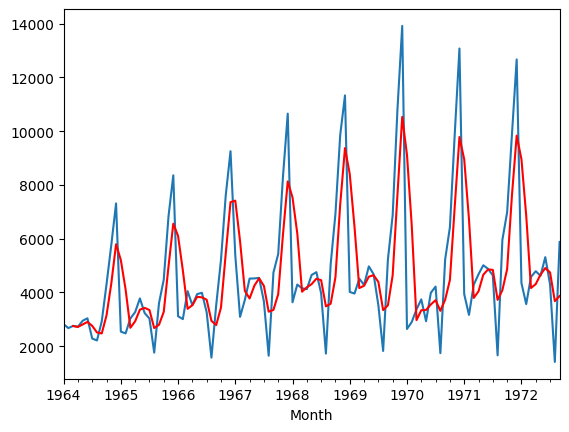

In [9]:
# plot os dados originais e os dados da média móvel 
series.plot()
rolling_mean.plot(color='red')
pyplot.show()

#### Média Móvel - Engenharia de Features



In [10]:
from pandas import DataFrame

In [11]:
# cria um dataframe df
df = DataFrame(series.values)

In [12]:
# imprime as 5 linhas do dataframe
df.head()

,0
0,2815
1,2672
2,2755
3,2721
4,2946


In [13]:
# cria uma constante
tamanho = 3

In [14]:
# cria uma variável com os dados deslocados +1
lag1 = df.shift(1)

In [15]:
# cria uma variável com os dados deslocados +3
lag3 = df.shift(tamanho)

In [16]:
# cria uma janela usando o rolling
window = lag3.rolling(window=tamanho)

In [17]:
# imprime a janela
window

Rolling [window=3,center=False,axis=0,method=single]

In [18]:
# cria a variável media que é a média da jenela.
media = window.mean()

In [19]:
# imprime a variável media
media

,0
0,NaN
1,NaN
2,NaN
3,NaN
4,NaN
...,...
100,6860.666667
101,4163.000000
102,4309.666667
103,4661.000000


In [20]:
# imprime o dataframe
df.head()

,0
0,2815
1,2672
2,2755
3,2721
4,2946


In [21]:
# concatena os dados
dataframe = concat([media, lag1, df], axis=1)

In [22]:
# cria as colunas
dataframe.columns = ['media', 't', 't+1']

In [23]:
lag3

,0
0,NaN
1,NaN
2,NaN
3,2815.0
4,2672.0
...,...
100,3564.0
101,4577.0
102,4788.0
103,4618.0


In [24]:
# imprime o dataframe
dataframe.head(10)

,media,t,t+1
0,NaN,NaN,2815
1,NaN,2815.0,2672
2,NaN,2672.0,2755
3,NaN,2755.0,2721
4,NaN,2721.0,2946
5,2747.333333,2946.0,3036
6,2716.000000,3036.0,2282
7,2807.333333,2282.0,2212
8,2901.000000,2212.0,2922
9,2754.666667,2922.0,4301


#### Previsões com Média Móvel



1.   Solução simples (walk-forward)
2.   Interessante para se criar baselines.
3.   Pode se usar Janelas Deslizantes para trabalhar com dados quentes.



In [25]:
from math import sqrt
from pandas import read_csv
from numpy import mean
from sklearn.metrics import mean_squared_error

In [26]:
series

Month
1964-01-01    2815
1964-02-01    2672
1964-03-01    2755
1964-04-01    2721
1964-05-01    2946
              ... 
1972-05-01    4618
1972-06-01    5312
1972-07-01    4298
1972-08-01    1413
1972-09-01    5877
Name: Sales, Length: 105, dtype: int64

In [27]:
# Define uma janela de 3 elementos
window = 3

In [28]:
# Obtem os 3 primeiros valores da serie
history = [series.values[i] for i in range(window)]

In [29]:
# imprime a variável history
history

[2815, 2672, 2755]

In [30]:
# Obtem todos os valores após os tres primeiros.
# range(3, tamanho_da_serie)

test = [series.values[i] for i in range(window, len(series.values))]

In [31]:
# imprime a variável test
# 10 primeiros valores da série após o history
test

[2721,
 2946,
 3036,
 2282,
 2212,
 2922,
 4301,
 5764,
 7312,
 2541,
 2475,
 3031,
 3266,
 3776,
 3230,
 3028,
 1759,
 3595,
 4474,
 6838,
 8357,
 3113,
 3006,
 4047,
 3523,
 3937,
 3986,
 3260,
 1573,
 3528,
 5211,
 7614,
 9254,
 5375,
 3088,
 3718,
 4514,
 4520,
 4539,
 3663,
 1643,
 4739,
 5428,
 8314,
 10651,
 3633,
 4292,
 4154,
 4121,
 4647,
 4753,
 3965,
 1723,
 5048,
 6922,
 9858,
 11331,
 4016,
 3957,
 4510,
 4276,
 4968,
 4677,
 3523,
 1821,
 5222,
 6872,
 10803,
 13916,
 2639,
 2899,
 3370,
 3740,
 2927,
 3986,
 4217,
 1738,
 5221,
 6424,
 9842,
 13076,
 3934,
 3162,
 4286,
 4676,
 5010,
 4874,
 4633,
 1659,
 5951,
 6981,
 9851,
 12670,
 4348,
 3564,
 4577,
 4788,
 4618,
 5312,
 4298,
 1413,
 5877]

In [32]:
# serie original
series.values

array([ 2815,  2672,  2755,  2721,  2946,  3036,  2282,  2212,  2922,
        4301,  5764,  7312,  2541,  2475,  3031,  3266,  3776,  3230,
        3028,  1759,  3595,  4474,  6838,  8357,  3113,  3006,  4047,
        3523,  3937,  3986,  3260,  1573,  3528,  5211,  7614,  9254,
        5375,  3088,  3718,  4514,  4520,  4539,  3663,  1643,  4739,
        5428,  8314, 10651,  3633,  4292,  4154,  4121,  4647,  4753,
        3965,  1723,  5048,  6922,  9858, 11331,  4016,  3957,  4510,
        4276,  4968,  4677,  3523,  1821,  5222,  6872, 10803, 13916,
        2639,  2899,  3370,  3740,  2927,  3986,  4217,  1738,  5221,
        6424,  9842, 13076,  3934,  3162,  4286,  4676,  5010,  4874,
        4633,  1659,  5951,  6981,  9851, 12670,  4348,  3564,  4577,
        4788,  4618,  5312,  4298,  1413,  5877])

**Previsão com Média Móvel - Janela deslizante**

In [33]:
# Define uma variavel chamada X que é a copia da serie de dados
X = series.values

# Define a variável window = 3 que será a janela de 3 valroes
window = 3

# Obtem os 3 primeiros valores da serie
history = [X[i] for i in range(window)]

# Obtem todos os valores após os tres primeiros.
test = [X[i] for i in range(window, len(X))]

# cria lista de predições
predicoes = []

# Intera sobre os dados de teste...

for t in range(len(test)):
  # define a variavel length com o tamanho da variável history
  length = len(history)
  
  # define a variável valor_predito com a média dos 3 valores correntes..                                                           
  valor_predito = mean([history[i] for i in range(length - window, length)])        
  
  # define a variável valor_real com o valor atual do teste..
  valor_real = test[t]                                                              
  
  # alimenta a lista de predicoes
  predicoes.append(valor_predito)                                                  
  
  # atualiza a lista history com os valores correntes..
  history.append(valor_real)                                                        
  
  # imprime o valor predito e o real...
  print('Valor predito=%f, Valor real=%f' % (valor_predito, valor_real))                 

Valor predito=2747.333333, Valor real=2721.000000
Valor predito=2716.000000, Valor real=2946.000000
Valor predito=2807.333333, Valor real=3036.000000
Valor predito=2901.000000, Valor real=2282.000000
Valor predito=2754.666667, Valor real=2212.000000
Valor predito=2510.000000, Valor real=2922.000000
Valor predito=2472.000000, Valor real=4301.000000
Valor predito=3145.000000, Valor real=5764.000000
Valor predito=4329.000000, Valor real=7312.000000
Valor predito=5792.333333, Valor real=2541.000000
Valor predito=5205.666667, Valor real=2475.000000
Valor predito=4109.333333, Valor real=3031.000000
Valor predito=2682.333333, Valor real=3266.000000
Valor predito=2924.000000, Valor real=3776.000000
Valor predito=3357.666667, Valor real=3230.000000
Valor predito=3424.000000, Valor real=3028.000000
Valor predito=3344.666667, Valor real=1759.000000
Valor predito=2672.333333, Valor real=3595.000000
Valor predito=2794.000000, Valor real=4474.000000
Valor predito=3276.000000, Valor real=6838.000000


In [35]:
# calcula a métrica de rmse
rmse = sqrt(mean_squared_error(test, predicoes))      

# imprime o valor de rmse
print('Métrica RMSE: %.3f' % rmse)                         

Métrica RMSE: 2960.299


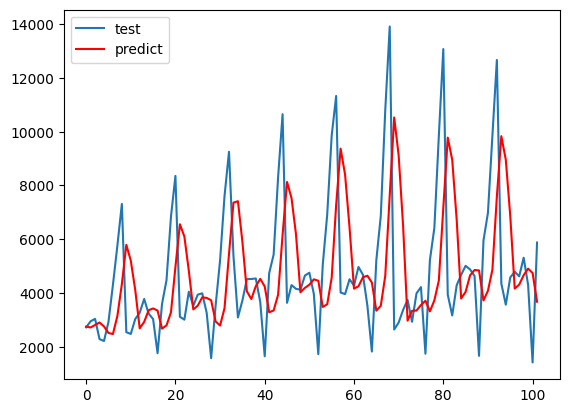

In [40]:
# plot o valor real (test) e as predições 
pyplot.plot(test) 
pyplot.plot(predicoes, color='red')
pyplot.legend(['test', 'predict'])
pyplot.show()

### Decompondo uma série temporal

- **Modelo aditivo**

                      y(t) = Level + Trend + Seasonality + Noise

  - Os componentes se somam.
  - A amplitude da sazonalidade se mantém com um aumento da tendência.




- **Modelo multiplicativo**

                      y(t) = Level × Trend × Seasonality × Noise
                
  - Os componentes se multiplicam.
  - A amplitude da sazonalidade também aumenta com a tendência

Monta o drive

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Importa a biblioteca Statsmodel

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.seasonal import seasonal_decompose

Ler a base de dados

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

Plotando a distribuição da série

In [ ]:
from pandas import read_csv 
from matplotlib import pyplot

# plota um histogram

pyplot.figure(1)
pyplot.subplot(211)
series.hist()

Visualizando os dados

In [ ]:
series.plot()

Criando um modelo aditivo

In [ ]:
resultado = seasonal_decompose(series,  model='additive')

In [ ]:
import matplotlib.pyplot as plt
resultado.plot()
pyplot.show()

Criando um modelo multiplicativo

In [ ]:
resultado = seasonal_decompose(series,  model='multiplicative')

In [ ]:
import matplotlib.pyplot as plt
resultado.plot()
pyplot.show()

### Removendo tendência e sazonalidade da série temporal

Considerações Gerais:

-      Conveniência: *Remover tendência e sazonalidade de várias séries para treinar um único modelo*.

-      Clareza na informação: *Remover as informações sazonais podem clarear os sinais nos dados. Exemplo: Os preços das ações da APPLE sobem a 5 anos. O modelo levar isso em consideração pode atrapalhar prever se o dia de amanhã será de alta ou não alta*

**Tipos de Sazonalidades, exemplo:**

- Hora do dia.
- Diário.
- Dia da Semana.
- Semanal.
- Mensal.
- Anual.

**Métodos Statísticos**
  - Remove informação sistematica que pode distorcer a relação entre as variáveis de entrada e alvo.
  - Adiciona informação sistemática para melhorar a relação entre as variáveis de entrada e variáveis de saída.
  - Tende a melhorar modelos devido a incapacidade de alguns métodos.

**Machine Learning**
  - Remove informação sistematica que pode distorcer a relação entre as variáveis de entrada e alvo.
  - Adiciona informação sistemática para melhorar a relação entre as variáveis de entrada e variáveis de saída.
  - Nem sempre melhora os modelos de Machine Learning.

Tendência obvia

In [ ]:
series.plot()

Decompondo a série

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
resultado = seasonal_decompose(series,  model='multiplicative')

In [ ]:
import matplotlib.pyplot as plt
resultado.plot()
plt.show()

#### Diferenciação

- *Diferenciação de primeiro nível*
- *Converte níveis para alterações*



                  value(t) = observation(t) − observation(t − 1)

In [ ]:
# cria uma lista vazia
diff = list()

In [ ]:
# para cada valor da série, subtrair pelo valor anterior
for i in range(1, len(series.values)):
  valor = series.values[i] - series.values[i - 1]
  diff.append(valor)

In [ ]:
# imprime os 10 primeiros valores da série
diff[:10]

In [ ]:
# plota a série após a diferenciação
from matplotlib import pyplot
pyplot.plot(diff)

In [ ]:
series.plot()

Removendo Sazonalidade

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
series.head()

In [ ]:
# cria uma lista chamada diff
diff = list()

# define o número de mês que iremos usar
mes = 1

# intera sobre os valores da série
for i in range(mes, len(series.values)):
  
  # a variavel valor recebe o valor da série atual - o valor da série do mês anterior..
  valor = series.values[i] - series.values[i - mes]
  
  # alimenta a lista diff
  diff.append(valor)  

In [ ]:
from matplotlib import pyplot
pyplot.plot(diff)
pyplot.show()

### Estacionariedade em Séries temporais

- Séries temporais são diferentes de problemas tradicionais de classificação e regressão. A estrutura temporal adiciona uma ordem as observações.
- Essa ordem imposta significa que suposições importantes sobre a consistência dessas observações precisam ser tratadas especialmente.
- Na terminologia de séries temporais, as séries cuja resumos estatísticos são constantes chamamos de séries estacionárias.

**Verifica estacionariedade de uma série:**

*   Olhe os gráficos.
*   Estatítica descritiva.
*   Testes Estatísticos.



In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

Analisando o histograma da série

In [ ]:
from matplotlib import pyplot
series.hist()
pyplot.show()

In [ ]:
# separa os dados em duas partes
split = int(len(series.values) / 2)

In [ ]:
print (len(series.values))
print (split)

In [ ]:
# Divide os dados em duas partes e coloca nas variáveis x1 e x2
X1 = series.values[0:split]
X2 = series.values[split:]

In [ ]:
# calcula as médias
mean1 =  X1.mean()
mean2 =  X2.mean()

In [ ]:
#mean1
mean2

In [ ]:
# calcula a variância entre as partes
var1, var2 = X1.var(), X2.var()

In [ ]:
# imprime média e variância entre as partes
print('media1= %f, \nmedia2= %f' % (mean1, mean2))

In [ ]:
print('variancia1= %f, \nvariancia2= %f' % (var1, var2))

Teste Estatístico - Augmented Dickey-Fuller test

- Hipotese Nula (H0): *Falha para rejeitar, sugere que a série não é estacionária. Esta tem estrutura dependente de tempo.*

- Hipotese Alternativa (H1): *A hipotese nula foi rejeitada, sugere que a série temporal é estacionária. Esta não tem estrutura dependente de tempo.*

* **p-value > 0.05**: Falha para rejeitar a hipotese nula (h0) a série é não estacionária.

* **p-value ≤ 0.05**: Rejeita a hipotese nula (H0), a série é estacionária.

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.stattools import adfuller

In [ ]:
resultado = adfuller(series.values)

In [ ]:
print('ADF teste: %f' % resultado[0])

In [ ]:
print('p-value: %f' % resultado[1])

In [ ]:
print('Critical Values:')
for key, value in resultado[4].items():
  print('\t%s: %.3f' % (key, value))

### Transformando a Série Temporal em Estacionária:

Aplicando Log na série

In [ ]:
from numpy import log

In [ ]:
serie_transformada = log(series.values)

In [ ]:
from matplotlib import pyplot
pyplot.hist(serie_transformada)
pyplot.show()

In [ ]:
resultado = adfuller(serie_transformada)
print('\nADF teste: %f' % resultado[0])
print('\np-value: %f' % resultado[1])
print('\nCritical Values:')
for key, value in resultado[4].items():
  print('\t%s: %.3f' % (key, value))

Aplicando a diferenciação

In [ ]:
# cria uma lista chamada diff
diff = list()
mes = 1
for i in range(mes, len(series.values)):
  # a variavel valor recebe o valor da série atual - o valor da série do mês anterior..
  valor = series.values[i] - series.values[i - mes]
  # alimenta a lista diff
  diff.append(valor)

Aplicando o Teste AdFuller

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(diff)
print('\nADF teste: %f' % resultado[0])
print('\np-value: %f' % resultado[1])
print('\nCritical Values:')
for key, value in resultado[4].items():
  print('\t%s: %.3f' % (key, value))

### Modelos de Previsão usando Autoregressão

#### **`ARIMA`**

Método estatístico que utiliza um modelo linear que utiliza autoregressão e modelo de média móvel para previsão de séries temporais. Um modelo linear é construído incluindo um número especificado de termos e o dado é preparado por um nível de diferenciação afim de tornar este estacionário.

Podemos usar um valor 0 para desligar um parâmetro, dessa forma, aquela função em questão não será feita, por exemplo, se no parâmetro d definirmos 0 não será realizada uma diferenciação nos dados. Neste exemplo teríamos um modelo **ARMA**.

---

*   **AR**: *Autoregression* : Um modelo que usa a relação dependende entre uma observação e alguns lags.

*   **I**: *Integrated*  : Uso de diferenciação nas observações brutas, exemplo: subtração do valor de uma observação com sua observação anterior. O objetivo é transformar a série temporal em estacionária.

*  **MA**: *Moving Average* : Um modelo que usa a dependência entre a observação e o erro residual a partir de um modelo de média móvel aplicado a lags.

          residual error = expected − predicted
    
- Isso é diferente de **Moving Average Smoothing.**
- Erros residuais contém estruturas temporais que podem ser modeladas.
- Existem sinais complexos nos erros residuais.
- Um modelo que prever o erro residual pode ser usado para ajustar os próximos erros e melhorar um modelo que aprende com o histórico.




---

O modelo arima contém alguns parâmetros


```
# ARIMA(p,d,q)
```
*   **p:** O número de lags que foram devem ser incluídos no modelo.
*   **d:** O número de vezes que as observações serão diferenciadas.
*   **q:** O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
from pandas.plotting import autocorrelation_plot
from matplotlib import pyplot

In [ ]:
# autocorrelation plot 
autocorrelation_plot(series)
pyplot.show()

In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [ ]:
plot_acf(series, lags=40)
pyplot.show()

Modelo ARIMA para análise de dados

In [ ]:
# fit model
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
model = ARIMA(series, order=(5,1,0))

In [ ]:
model_fit = model.fit()

In [ ]:
# summary of fit model 
print(model_fit.summary())

In [ ]:
# line plot of residuals
from pandas import DataFrame
residuals = DataFrame(model_fit.resid)

In [ ]:
residuals.plot()
pyplot.show()

In [ ]:
# density plot of residuals 
residuals.plot(kind='kde')
pyplot.show()

In [ ]:
# summary stats of residuals
print(residuals.describe())

### Projeto: Prevendo dados futuros.

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
from IPython.display import Image
Image('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/time_series_project.png')

**Boas Práticas**

*   Comece com um baseline simples para ter referência.
*   Faça uma análise de dados antes de iniciar previsão de valores.
*   Teste Modelos difentes e avalie:
  - Complexidade.
  - Intepretabilidade.
  - Custo computacional.
*   Faça teste A/B antes de colocar em produção sua solução.

**Separando os dados para treino, teste e validação**

Vamos separar dois arquivos fisicos:

  - **dataset.csv**: Dados de 1964 a setembro de 1971.

  - **validation.csv**: Dados de Outubro de 1971 a Outubro de 1972 (1 ano de vendas).

In [ ]:
# pega a quantidade de linhas e subtrai por 12
split_point = len(series) - 12

In [ ]:
# define que a variável dataset vai conter linhas até o split_point
dataset = series[0:split_point]

In [ ]:
# define que a variável validation terá os dados do split_point em diante
validation = series[split_point:]

In [ ]:
# imprime o tamanho dos conjuntos
print('Dataset %d, Validation %d' % (len(dataset), len(validation)))

In [ ]:
# escreve para o disco
dataset.to_csv('dataset.csv')

In [ ]:
# escreve para o disco.
validation.to_csv('validation.csv')

**Analise de Dados**

In [ ]:
import pandas as pd
series = pd.read_csv('/content/dataset.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
series.describe()

*   A média é de 4,641 isso significa em o nível da nossa série é de 4,641 vendas em média.
*   O desvio padrão é relativamente alto 2,486 vendas variando a partir da média.
*   Os quartis juntamente com o desvio padrão nos mostra que os dados estão espalhados da média.

In [ ]:
# Dados na linha do tempo
series.plot()

   - Aparentemente existe um aumento de tendência de vendas ao longo dos anos.
   - Aparentemente existe uma sazonalidade nas vendas por anos.
   - Aparentemente a amplitude da sazonalidade aumenta conforme a tendência, isso pode sugerir um relacionamento multiplicativo.
   - Aparentemente não existe qualquer outlier.
   - Como vimos que há uma tendência e uma sazonalidade (obvias) isso nos dá forte indício que estamos trabalhando com uma série não estacionária.

**Visualizando a Sazonalidade**

Podemos confirmar nossa suposição de que a sazonalidae é anual. No código abaixo plotamos os dados agrupados por ano para visualizar as vendas de cada ano. 


In [ ]:
from pandas import DataFrame
from pandas import Grouper

In [ ]:
grupos = series['1964':'1970'].groupby(Grouper(freq='A'))
anos = DataFrame()
for nome, grupo in grupos:
  anos[nome.year] = grupo.values

anos.plot(figsize=(10,5)
          ,subplots=True
          ,title='Vendas em meses por anos')

- Podemos ver claramente que as vendas caiem em agosto e aumentam do final do mês seguinte até o final do ano. Isso se repete a cada ano.

**Plotando a distribuição da Série**
-  A distribuição não é uma normal.
-  A forma tem uma longa cauda a direita. Isso pode sugerir algum tipo de transformação.

In [ ]:
# Distribuição da Série
from matplotlib import pyplot
pyplot.figure(1)
pyplot.subplot(211)
series.hist()
pyplot.subplot(212)
series.plot(kind='kde')
pyplot.show()

**Visualizando Autocorrelação**

In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [ ]:
plot_acf(series, lags=40)
pyplot.show()

**Checando Estacionariedade**

In [ ]:
import pandas.util.testing as tm
from statsmodels.tsa.stattools import adfuller

resultado = adfuller(series.values)
print('\nADF teste: %f' % resultado[0])
print('\np-value: %f' % resultado[1])
print('\nCritical Values:')
for key, value in resultado[4].items():
  print('\t%s: %.3f' % (key, value))

**Especificando um Baseline**
- Um baseline é um valor simples que temos para começar o nosso projeto.
- Serve de referência para saber como nosso modelo está se saindo.
- Exemplo: Valor de previsão é o valor anterior, no nosso caso, o valor do mês anterior.

In [ ]:
import pandas as pd
series = pd.read_csv('/content/drive/My Drive/Curso Séries Temporais/Materiais de Apoio/champagne_sales.csv', header=0, index_col=0, parse_dates=True, squeeze=True)

In [ ]:
# atribui os dados a variável X 
X = series.values

In [ ]:
# define o tamanho do conjunto de treino (50% dos dados para treino e teste)
train_size = int(len(X) * 0.50)

In [ ]:
# cria os conjuntos de treino e teste
train = X[0:train_size]
test = X[train_size:]

In [ ]:
# obtem todos od dados do treino 
history = [x for x in train]

In [ ]:
# imprime os 10 primeiros valores da variável history
history[:10]

In [ ]:
# imprime o último valor da variável history
history[-1]

In [ ]:
# cria lista de previsões
predictions = list()

In [ ]:
# aplicando o modelo naive
for i in range(len(test)):
  
  # valor_predito recebe o último valor do conjunto de treino
  valor_predito = history[-1]
  
  # a primeira previsão é o último valor do conjunto de treino
  predictions.append(valor_predito)
  
  # valor real recebe o valor atual do teste.
  valor_real = test[i]
  
  # adiciona o valor real para a lista de historico
  history.append(valor_real)
  
  # imprime valor predito e valor real..
  print('Valor Predito=%.3f, Valor }Esperado=%3.f' % (valor_predito, valor_real))

In [ ]:
# avaliando o modelo naive
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(test, predictions))
print('RMSE: %.3f' % rmse)

**Prevendo dados com ARIMA com Walk Forward**

Visualizando a autocorrelação dos lags.

In [ ]:
import pandas.util.testing as tm
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

In [ ]:
plot_acf(series, lags=40)
pyplot.show()

Separando os dados de treino e teste

In [ ]:
series.tail()

In [ ]:
# a variável X recebe os dados da série
X = series.values
X = X.astype('float32')

In [ ]:
# Separa os dados com 50% dos dados para treino e 50% dos dados para teste
size = int(len(X) * 0.50)

In [ ]:
# Separa dados de treino e teste
train = X[0:size]
test =  X[size:]

In [ ]:
# cria a variável history
history = [x for x in train]

In [ ]:
# cria lista de previsões
predictions = list()

In [ ]:
# Cria a função que faz a diferenciação
def difference(dataset, interval=1):
  diff = list() 
  for i in range(interval, len(dataset)):
    value = dataset[i] - dataset[i - interval]
    diff.append(value)
  return diff

# cria função que reverte o valor diferenciado para o original
def inverse_difference(history, previsao, interval=1):
  return previsao + history[-interval]

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
from matplotlib import pyplot

In [ ]:
# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(1,1,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

In [ ]:
# Avaliando os resultados
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

In [ ]:
# plot forecasts against actual outcomes 
pyplot.plot(test)
pyplot.plot(predictions, color='red')
pyplot.show()

**Código inteiro - Importante**

In [ ]:
# cria a variável history
history = [x for x in train]

# cria lista de previsões
predictions = list()

# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(1,1,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

#### **Tunning Arima**



*   GridSearch
*   Teste exaustivo com as combinações de parâmetros (p,d,q)



Cria a função que executa o modelo Arima

In [ ]:
def evaluate_arima_model(X, arima_order):
  # converte o conjunto de dados
  X = X.astype('float32')
  # Separa os dados com 50% dos dados para treino e 50% para teste 
  train_size = int(len(X) * 0.50)
  train, test = X[0:train_size], X[train_size:]
  history = [x for x in train] 
  # cria a lista de previsões
  predictions = list()
  for t in range(len(test)):
    # aplica diferenciação nos dados
    months_in_year = 12
    diff = difference(history, months_in_year)
    # treina o modelo ARIMA
    model = ARIMA(diff, order=arima_order)
    model_fit = model.fit(trend='nc', disp=0)
    # recebe os dados previtos pelo modelo
    valor_previsto = model_fit.forecast()[0]
    valor_previsto = inverse_difference(history, valor_previsto, months_in_year)
    # adiciona os dados na lista de previsões
    predictions.append(valor_previsto)
    history.append(test[t])
  # calculate o erro rmse
  rmse = sqrt(mean_squared_error(test, predictions))
  return rmse

In [ ]:
# Loop com combinações de p, d e q para modelo ARIMA
def evaluate_models(dataset, p_values, d_values, q_values):
  dataset = dataset.astype('float32')
  best_score, best_cfg = float("inf"), None
  # intera sobre todos os valores de p
  for p in p_values:
    # intera sobre todos os valores de d
    for d in d_values:
      # intera sobre todos os valoes de q
      for q in q_values:
        order = (p,d,q)
        try:
          # chama a funcão que executa o ARIMA
          rmse = evaluate_arima_model(dataset, order)
          if rmse < best_score:
            best_score, best_cfg = rmse, order
          print('ARIMA%s RMSE=%.3f' % (order,rmse))
        except:
          continue 
    print('Best ARIMA%s RMSE=%.3f' % (best_cfg, best_score))

In [ ]:
# Define a lista de valores para cada parâmetro
p_values = range(0, 7)
d_values = range(0, 3)
q_values = range(0, 7)

In [ ]:
# elimina os warnings da biblioteca
import warnings
warnings.filterwarnings("ignore")

In [ ]:
# chama a funcão passando os parâmetros
evaluate_models(series.values, p_values, d_values, q_values)

Executando o modelo com a melhor configuração de ARIMA

In [ ]:
# cria a variável history
history = [x for x in train]

# cria lista de previsões
predictions = list()

# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12
  diff = difference(history, meses_no_ano)
  
  # cria um modelo ARIMA com os dados de history
  model = ARIMA(diff, order=(0,0,1))
  
  # treina o modelo ARIMA
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]

  # valor_predito recebe o valor revertido (escala original)
  valor_predito = inverse_difference(history, valor_predito, meses_no_ano)
   
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

In [ ]:
# Avaliando os resultados
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

#### `Analisando Resíduos`

      Erro Residual = Valor esperado − Valor Predito

- Erros residuais são erros em previsões de séries temporais.
- Uma análise dos erros pode sugerir melhoras no modelo.
  - Tendências.
  - Sazonalidades.

In [ ]:
# erros residuais 
residuals = [test[i] - predictions[i] for i in range(len(test))]

In [ ]:
# converte a lista em um dataframe
residuals = pd.DataFrame(residuals)

In [ ]:
# imprime as 5 primeiras linhas
residuals.head()

In [ ]:
# estatística descritiva
residuals.describe()

In [ ]:
# plot residuals
residuals.plot()
pyplot.show()

In [ ]:
# plots histograma
pyplot.figure()
pyplot.subplot(211)
residuals.hist(ax=pyplot.gca())

pyplot.subplot(212)
residuals.plot(kind='kde', ax=pyplot.gca())
pyplot.show()

In [ ]:
# importa os pacotes de autocorrelação
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf

In [ ]:
# plots de autocorrelação
pyplot.figure() 
pyplot.subplot(211)
plot_acf(residuals, ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(residuals, ax=pyplot.gca())
pyplot.show()

Decompondo a série de erro residual

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(residuals, model='additive', freq=1)
result.plot()
pyplot.show()

**SARIMA**

```
# ARIMA(p,d,q)
```
*   **p:** O número de lags que foram devem ser incluídos no modelo.
*   **d:** O número de vezes que as observações serão diferenciadas.
*   **q:** O tamanho de uma janela de média móvel. Também chamada de ordem de média móvel.

SARIMA(p, d, q).(P,D,Q)m


> - SARIMA é usado para séries não estacionárias, que é os dados não flutuam em volta da média. Esse modelo pode identificar tendência e sazonalizadade.

> - Porque considerar a sazonalidade é importante?

A sazonalidade é importante principalmente quando sabemos que as vendas aumentam ou diminuiem em determinados eventos (feriados, inverno, verão, etc). Podemos querer modelar esses fenômenos.

`Exemplo: Não gostaríamos de comparar as vendas do primeiro trimestre de 2020 com as do quarto trimestre de 2019 sem ajustar esse pico sistemático - sem levar em consideração a sazonalidade, assumiríamos por engano que as vendas diminuiram muito (e nossa empresa estava com grandes problemas) quando realmente é apenas a ressaca pós-feriado prevista.`



In [ ]:
import statsmodels.api as sm

In [ ]:
# cria a variável history
history = [x for x in train]

# cria lista de previsões
predictions = list()

# inicia Walk-Forward
for t in range(len(test)):
  
  # difference data
  meses_no_ano = 12

  # cria um modelo SARIMA com os dados de history
  # desliga a diferenciação do modelo ARIMA
  model = sm.tsa.statespace.SARIMAX(history, order=(1,0,1), seasonal_order=(1,1,1, meses_no_ano))
  
  # treina o modelo SARIMAX
  model_fit = model.fit(trend='nc', disp=0)
  
  # a variável valor_predito recebe o valor previsto pelo modelo
  valor_predito = model_fit.forecast()[0]
 
  # adiciona o valor predito na lista de predicões
  predictions.append(valor_predito)
  
  # a variável valor_real recebe o valor real do teste
  valor_real = test[t]
  
  # adiciona o valor real a variável history
  history.append(valor_real)

  # imprime valor predito e valor real
  print('Valor predito=%.3f, Valor esperado=%3.f' % (valor_predito, valor_real))

In [ ]:
# Avaliando os resultados
rmse = sqrt(mean_squared_error(test, predictions))
print('Test RMSE: %.3f' % rmse)

**Facebook Prophet**

- Biblioteca criada pelo Facebook com o objetivo de ser usada na rede social.
- Motivação: Facilitar a criação de modelos sem necessariamente ter experts para isso.
- Focada em modelar sazonalidades, efeitos de feriados e tratar missing values.

In [ ]:
# importa o Prophet
from fbprophet import Prophet

In [ ]:
# ds: features temporais
# y: valores a serem preditos

dataframe = pd.DataFrame({'ds': dataset.index, 'y': dataset.values})

In [ ]:
# dataframe do prophet
dataframe.head()

In [ ]:
# instancia o objeto prophet
model = Prophet()

In [ ]:
# gerando o modelo
model.fit(dataframe)

In [ ]:
# gerando dados futuros
futuro = model.make_future_dataframe(periods = 12, freq='M')

In [ ]:
futuro

In [ ]:
# prevendo valores para dados futuros
saida = model.predict(futuro)

In [ ]:
# imprime saidas
saida.head()

In [ ]:
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(7)

**Validando o modelo com Prophet**

In [ ]:
# dataset de validação
validation_df = pd.DataFrame({'ds': validation.index})

In [ ]:
# dados temporais
validation_df['ds']

In [ ]:
# aplicando o modelo do prophet
saida = model.predict(validation_df)

In [ ]:
# imprime as saidas
saida[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

In [ ]:
validation

In [ ]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

**Prevendo o futuro**

In [ ]:
# Python
figura = model.plot(saida)

In [ ]:
model.plot_components(saida)

### Tunning do Prophet

- `seasonality_mode`: Este parâmetro indica como seus componentes de sazonalidade devem ser integrados às previsões. O valor padrão é `additive`, com o parâmetro `multiplicative` sendo a outra opção. Você deve usar o  aditivo quando sua tendência de sazonalidade for "constante" durante todo o período. Por exemplo, quando você deseja que seu impacto no crescimento da tendência anual seja o mesmo que em 2010 e 2018. Isso é aplicável nos dados em que a mudança de tendência parece permanecer constante, por exemplo, o número de pessoas que vivem em uma cidade pequena. Isso ocorre porque não esperamos que o crescimento aumente repentinamente em milhões, porque não há infraestrutura para isso. Por outro lado, quando queremos prever a quantidade de pessoas que vivem em uma cidade em crescimento, o número anual de tendências pode ser muito mais importante nos últimos anos, pois a infraestrutura existe. A taxa de crescimento populacional pode ser muito mais rápida do que teria sido nos primeiros anos. Em um caso como esse, você usará multiplicativo para aumentar a importância das sazonalidades ao longo do tempo. 

- `seasonality_prior_scale`. Este parâmetro novamente permitirá que suas sazonalidades sejam mais flexíveis. É possível definir os parâmetros `anual_seasonality`, `Weekly_seasonality` e `daily_seasonality` separadamente ou ainda adiciona sua própria configuração de sazonalidade.

In [ ]:
from fbprophet import Prophet

In [ ]:
import pandas as pd
dataframe = pd.DataFrame({'ds': dataset.index, 'y': dataset.values})

In [ ]:
dataframe

Alterando o modo de sazonalidade

In [ ]:
model = Prophet(seasonality_mode='multiplicative')

In [ ]:
model.fit(dataframe)

In [ ]:
validation_df = pd.DataFrame({'ds': validation.index})

In [ ]:
saida = model.predict(validation_df)

In [ ]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)

Alterando tipos de sazonalidade

In [ ]:
# cria um modelo com sazonalidade  multiplicativa e desligando a sazonalidade diária
model = Prophet(seasonality_mode='multiplicative', daily_seasonality=False, )

In [ ]:
model.fit(dataframe)

In [ ]:
# imprime a sazonalidade habilitada
model.seasonalities

In [ ]:
# cria o dataframe de validação
validation_df = pd.DataFrame({'ds': validation.index})

In [ ]:
# prevendo dados
saida = model.predict(validation_df)

In [ ]:
# Avaliando os resultados
from sklearn.metrics import mean_squared_error
from math import sqrt
rmse = sqrt(mean_squared_error(validation.values, saida.yhat))
print('Test RMSE: %.3f' % rmse)